In [18]:
library(MMUPHin)
# tidyverse packages for utilities
library(magrittr)
library(dplyr)
library(ggplot2)
library(qiime2R)
library(tidyr)
library(phyloseq)
library(microbiome)
library(textshape)
library(genefilter)
library(corrplot)

In [21]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/tableV_BacArc_merge_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/taxaVsearch_rep_merge_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 80037 rows [1, 2, 10, 13, 16, 19, 21, 24, 27, 29, 30, 38, 40, 41, 42, 44, 46, 48, 52, 54, ...].”


In [22]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [193]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

physeq_16S

In [61]:
physeq_16S_SS = physeq_16S %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)

In [110]:
physeq_all = subset_samples(physeq_16S , sample_type %in% c("TissueSlurry", "Mucus", "TissueSlurry_Skleton") &
                       field_host_genus_id != "Acropora")
physeq_all


physeq_DL = subset_samples(physeq_all , tissue_type %in% c("AH", "DL")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_DL                         
                         
physeq_DU = subset_samples(physeq_all , tissue_type %in% c("AH", "DU")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_DU
                        

                       

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 1572 samples ]
sample_data() Sample Data:       [ 1572 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6975 taxa and 1247 samples ]
sample_data() Sample Data:       [ 1247 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 6975 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5302 taxa and 1031 samples ]
sample_data() Sample Data:       [ 1031 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 5302 taxa by 8 taxonomic ranks ]

In [29]:
physeq_Skeleton_all = subset_samples(physeq_16S , sample_type %in% "TissueSlurry_Skleton")
physeq_Skeleton_all



physeq_Skeleton_DL = subset_samples(physeq_Skeleton_all , tissue_type %in% c("AH", "DL")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_Skeleton_DL                         
                         
physeq_Skeleton_DU = subset_samples(physeq_Skeleton_all , tissue_type %in% c("AH", "DU")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_Skeleton_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 113 taxa and 45 samples ]
sample_data() Sample Data:       [ 45 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 113 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 8 taxonomic ranks ]

In [31]:
physeq_mucus_all = subset_samples(physeq_16S , sample_type %in% "Mucus")
physeq_mucus_all



physeq_mucus_DL = subset_samples(physeq_mucus_all , tissue_type %in% c("AH", "DL")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_mucus_DL                         
                         
physeq_mucus_DU = subset_samples(physeq_mucus_all , tissue_type %in% c("AH", "DU")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_mucus_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 393 samples ]
sample_data() Sample Data:       [ 393 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1377 taxa and 266 samples ]
sample_data() Sample Data:       [ 266 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 1377 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1434 taxa and 326 samples ]
sample_data() Sample Data:       [ 326 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 1434 taxa by 8 taxonomic ranks ]

In [36]:
physeq_tissue_all = subset_samples(physeq_16S , sample_type %in% "TissueSlurry" & field_host_genus_id !="Acropora")
physeq_tissue_all



physeq_tissue_DL = subset_samples(physeq_tissue_all , tissue_type %in% c("AH", "DL")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
physeq_tissue_DL                        
                         
physeq_tissue_DU = subset_samples(physeq_tissue_all , tissue_type %in% c("AH", "DU")) %>%
# Subset features to genus
subset_taxa(!is.na(Genus)) %>%
# Normalize abundances to relative abundance scale
 transform_sample_counts(function(x) x / sum(x)) %>%
# Filter features to be of at least 1e-5 relative abundance in five samples
  filter_taxa(kOverA(10, 1e-5), prune = TRUE)
                         
physeq_tissue_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97411 taxa and 1126 samples ]
sample_data() Sample Data:       [ 1126 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 97411 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5797 taxa and 936 samples ]
sample_data() Sample Data:       [ 936 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 5797 taxa by 8 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3924 taxa and 669 samples ]
sample_data() Sample Data:       [ 669 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 3924 taxa by 8 taxonomic ranks ]

In [62]:
abd_SS <- otu_table(physeq_16S_SS)@.Data
meta_SS <- data.frame(sample_data(physeq_16S_SS))


abd_DL <- otu_table(physeq_DL)@.Data
meta_DL <- data.frame(sample_data(physeq_DL))


abd_DL <- otu_table(physeq_DL)@.Data
meta_DL <- data.frame(sample_data(physeq_DL))

abd_DU <- otu_table(physeq_DU)@.Data
meta_DU <- data.frame(sample_data(physeq_DU))


abd_skeleton_DL <- otu_table(physeq_Skeleton_DL)@.Data
meta_skeleton_DL <- data.frame(sample_data(physeq_Skeleton_DL))

abd_skeleton_DU <- otu_table(physeq_Skeleton_DU)@.Data
meta_skeleton_DU <- data.frame(sample_data(physeq_Skeleton_DU))

abd_mucus_DL <- otu_table(physeq_mucus_DL)@.Data
meta_mucus_DL <- data.frame(sample_data(physeq_mucus_DL))

abd_mucus_DU <- otu_table(physeq_mucus_DU)@.Data
meta_mucus_DU <- data.frame(sample_data(physeq_mucus_DU))

abd_tissue_DL <- otu_table(physeq_tissue_DL)@.Data
meta_tissue_DL <- data.frame(sample_data(physeq_tissue_DL))

abd_tissue_DU <- otu_table(physeq_tissue_DU)@.Data
meta_tissue_DU <- data.frame(sample_data(physeq_tissue_DU))



In [63]:
D_before <- vegdist(t(abd_SS))

Warning message in vegdist(t(abd_SS)):
“you have empty rows: their dissimilarities may be meaningless in method “bray””


In [64]:

envfit(D_before ~ tissue_type + collection_year + reef_name + sample_type + species_code + 
       Alias + primer_names + dna_extraction_method + Lab, data = meta_SS, na.rm = TRUE)


***FACTORS:

Centroids:
                                                                                                                 100tiss_S31
tissue_typeAH                                                                                                         0.9172
tissue_typeDL                                                                                                         0.9408
tissue_typeDU                                                                                                         0.7696
tissue_typeNaN                                                                                                        1.0000
collection_year2016                                                                                                   0.9980
collection_year2017                                                                                                   0.9542
collection_year2018                                                                                 

In [66]:
fit_adjust_batch <- adjust_batch(feature_abd = abd_SS,
                                 batch = "Alias",
                                 #covariates = "Lab",
                                 data = meta_SS,
                                 control = list(verbose = FALSE))

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”


In [73]:
abd_adj <- fit_adjust_batch$feature_abd_adj
abd_adj_df = as.data.frame(abd_adj)


In [74]:
ps_abd_adj <- phyloseq(otu_table(abd_adj_df, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))
ps_abd_adj


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10544 taxa and 2003 samples ]
sample_data() Sample Data:       [ 2003 samples by 59 sample variables ]
tax_table()   Taxonomy Table:    [ 10544 taxa by 8 taxonomic ranks ]

In [75]:
ps_abd_adj.ord <- ordinate(ps_abd_adj, "PCoA", "bray")

Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“you have empty rows: their dissimilarities may be meaningless in method “bray””


In [70]:
ps_abd.ord <- ordinate(physeq_16S_SS, "PCoA", "bray")

Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“you have empty rows: their dissimilarities may be meaningless in method “bray””


Warning message in plot_ordination(ps_abd_adj, ps_abd_adj.ord, color = "Alias", :
“Shape variable was not found in the available data you provided.No shape mapped.”
Warning message in plot_ordination(physeq_16S_SS, ps_abd.ord, color = "Alias", shape = "pimers_names", :
“Shape variable was not found in the available data you provided.No shape mapped.”


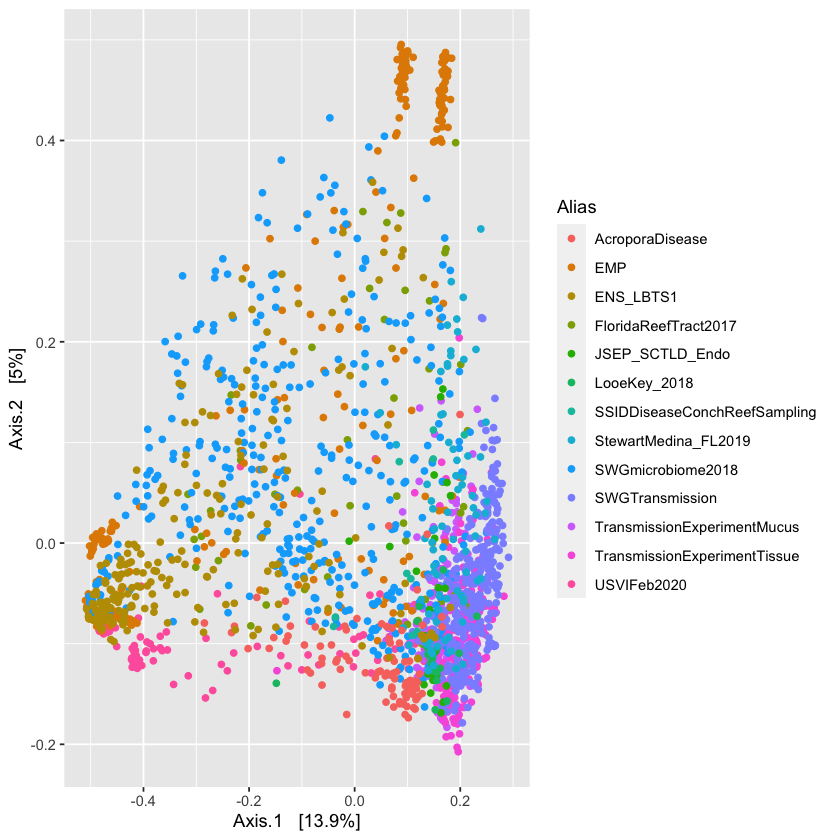

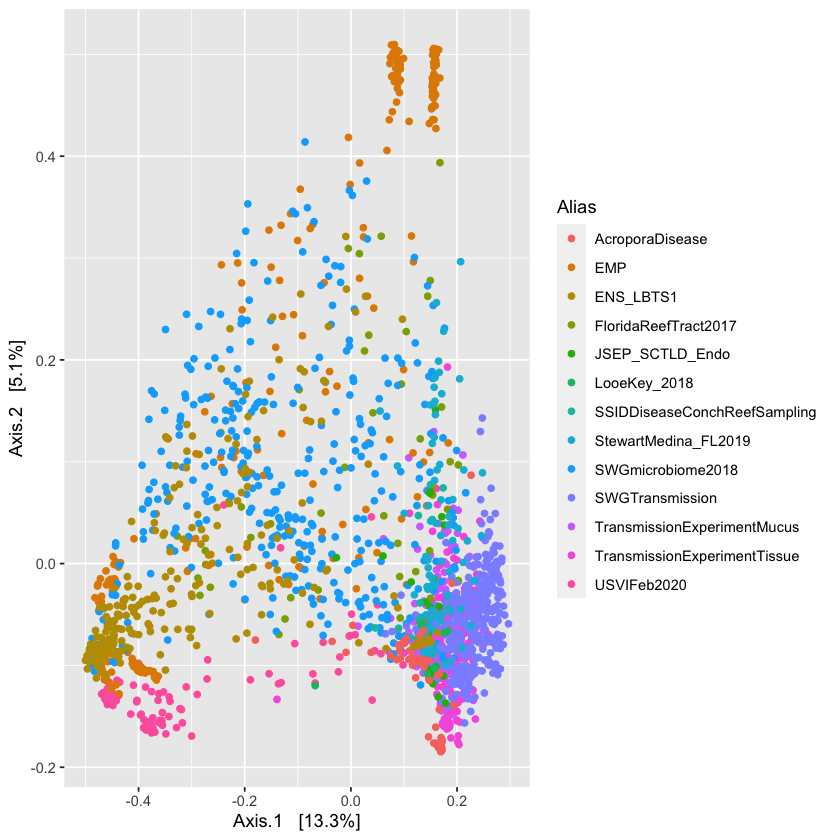

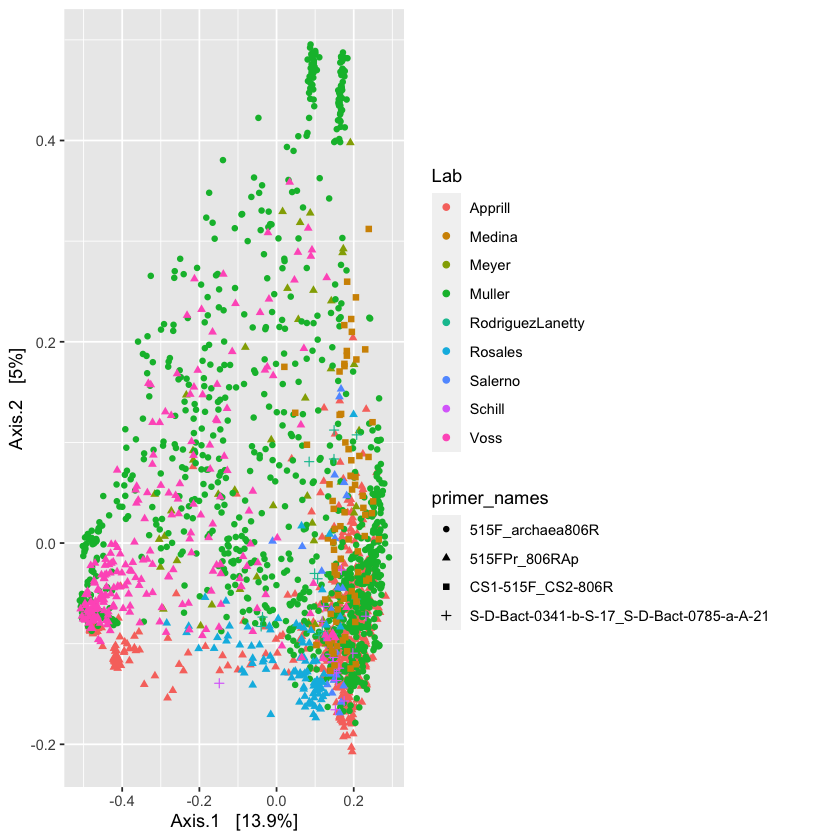

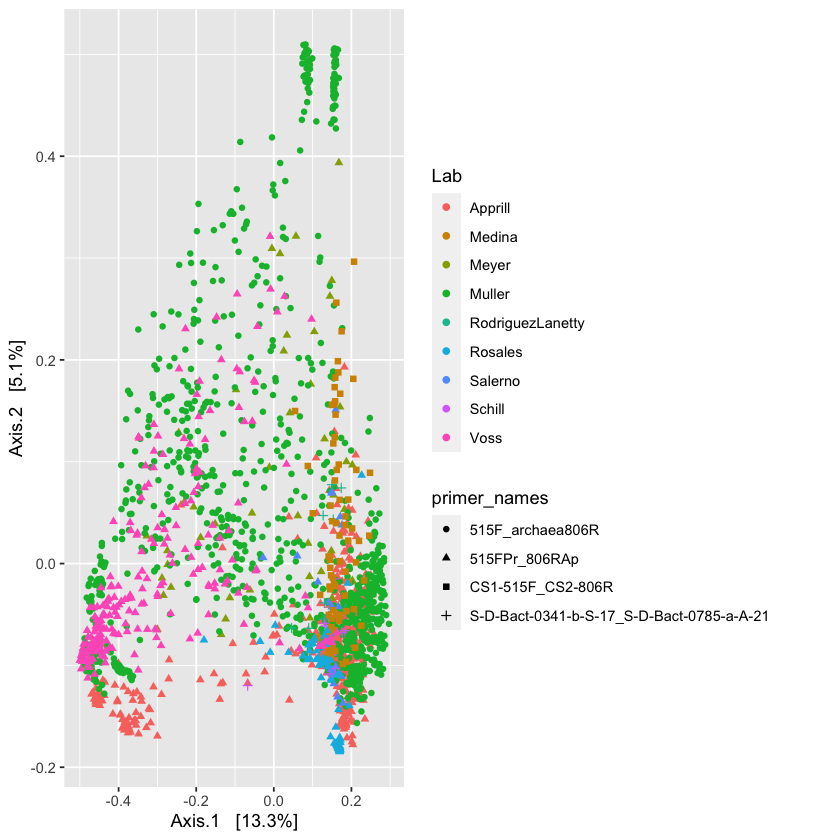

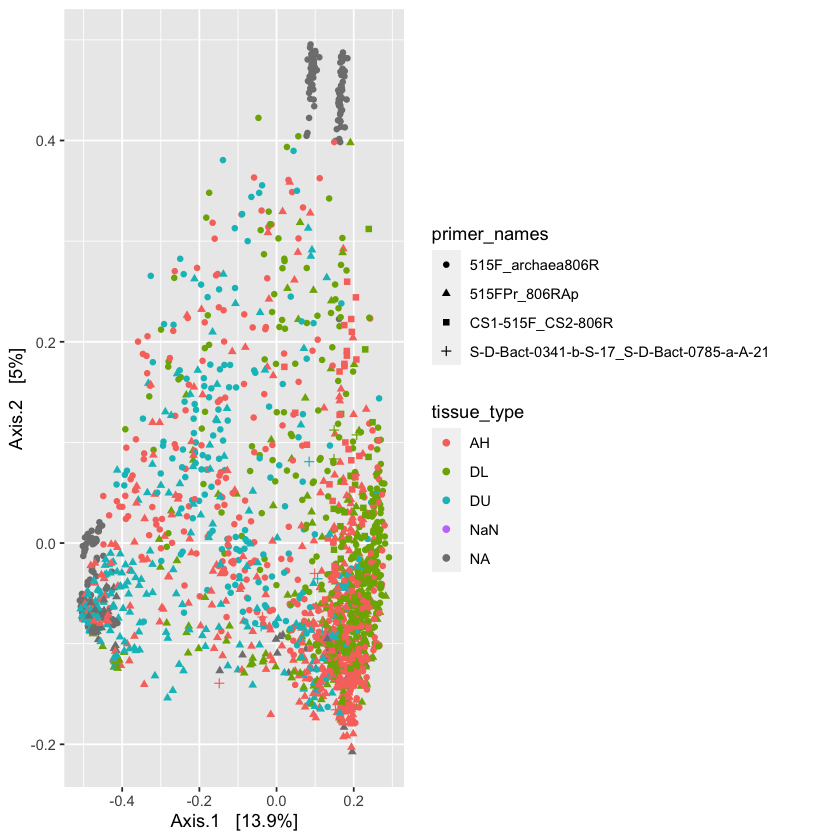

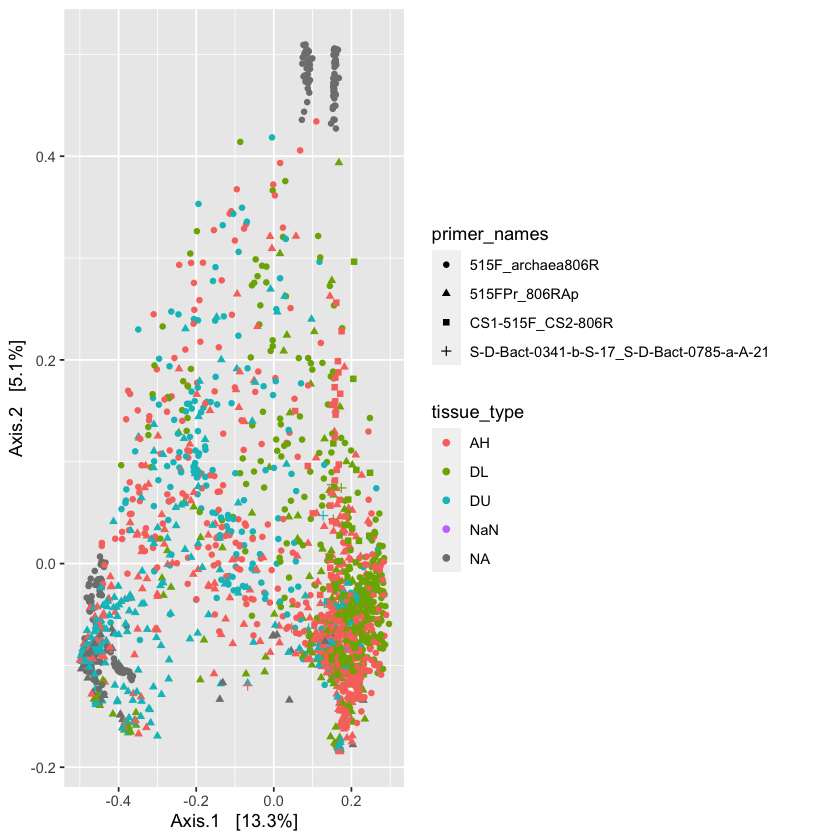

In [76]:
plot_ordination(ps_abd_adj, ps_abd_adj.ord,
                               color="Alias",
                              shape="pimers_names", axes = c(1,2))

plot_ordination(physeq_16S_SS, ps_abd.ord,
                               color="Alias",
                              shape="pimers_names", axes = c(1,2))



plot_ordination(ps_abd_adj, ps_abd_adj.ord,
                               color="Lab",
                              shape="primer_names", axes = c(1,2))

plot_ordination(physeq_16S_SS, ps_abd.ord,
                               color="Lab",
                              shape="primer_names", axes = c(1,2))




plot_ordination(ps_abd_adj, ps_abd_adj.ord,
                               color="tissue_type",
                              shape="primer_names", axes = c(1,2))

plot_ordination(physeq_16S_SS, ps_abd.ord,
                               color="tissue_type",
                              shape="primer_names", axes = c(1,2))


In [77]:
#D_before <- vegdist(t(abd_SS))
D_after <- vegdist(t(abd_adj_df))


Warning message in vegdist(t(abd_adj_df)):
“you have empty rows: their dissimilarities may be meaningless in method “bray””


In [78]:
# fix random seed as adonis runs randomized permutations
set.seed(1)
adonis(D_before ~ Alias, data = meta_SS)
adonis(D_after ~ Alias, data = meta_SS)


Call:
adonis(formula = D_before ~ Alias, data = meta_SS) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alias       12    190.80 15.9003  46.124 0.21761  0.001 ***
Residuals 1990    686.01  0.3447         0.78239           
Total     2002    876.81                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = D_after ~ Alias, data = meta_SS) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alias       12    166.81 13.9004  39.777 0.19346  0.001 ***
Residuals 1990    695.43  0.3495         0.80654           
Total     2002    862.24                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [80]:
fit_lm_meta_DL <- lm_meta(feature_abd = abd_DL,
                       batch = "Alias",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_DL,
                       control = list(verbose = FALSE))

meta_fits_DL <- fit_lm_meta_DL$meta_fits

colnames(meta_fits_DL)
dim(meta_fits_DL)
colnames(meta_fits_DL)
meta_fits_DL=rename(meta_fits_DL, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in lm_meta(feature_abd = abd_DL, batch = "Alias", exposure = "tissue_type", :
“Exposure variable is missing or has only one non-missing value in the following batches; Maaslin2 won't be fitted on them
ENS_LBTS1”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature d0bf81d3055208c3a52560a6bf3955c7;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature 3fac026f57dc7ed944eef6bb4176ace4;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(ma

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_AcroporaDisease"             
[13] "weight_EMP"                          "weight_FloridaReefTract2017"        
[15] "weight_JSEP_SCTLD_Endo"              "weight_LooeKey_2018"                
[17] "weight_SSIDDiseaseConchReefSampling" "weight_StewartMedina_FL2019"        
[19] "weight_SWGmicrobiome2018"            "weight_SWGTransmission"             
[21] "weight_TransmissionExperimentMucus"  "weight_TransmissionExperimentTissue"
[23] "weight_USVIFeb2020"                  "pval.bonf"                          
[25] "qval.fdr"

[1] 7074   25

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_AcroporaDisease"             
[13] "weight_EMP"                          "weight_FloridaReefTract2017"        
[15] "weight_JSEP_SCTLD_Endo"              "weight_LooeKey_2018"                
[17] "weight_SSIDDiseaseConchReefSampling" "weight_StewartMedina_FL2019"        
[19] "weight_SWGmicrobiome2018"            "weight_SWGTransmission"             
[21] "weight_TransmissionExperimentMucus"  "weight_TransmissionExperimentTissue"
[23] "weight_USVIFeb2020"                  "pval.bonf"                          
[25] "qval.fdr"

Joining, by = "Feature.ID"



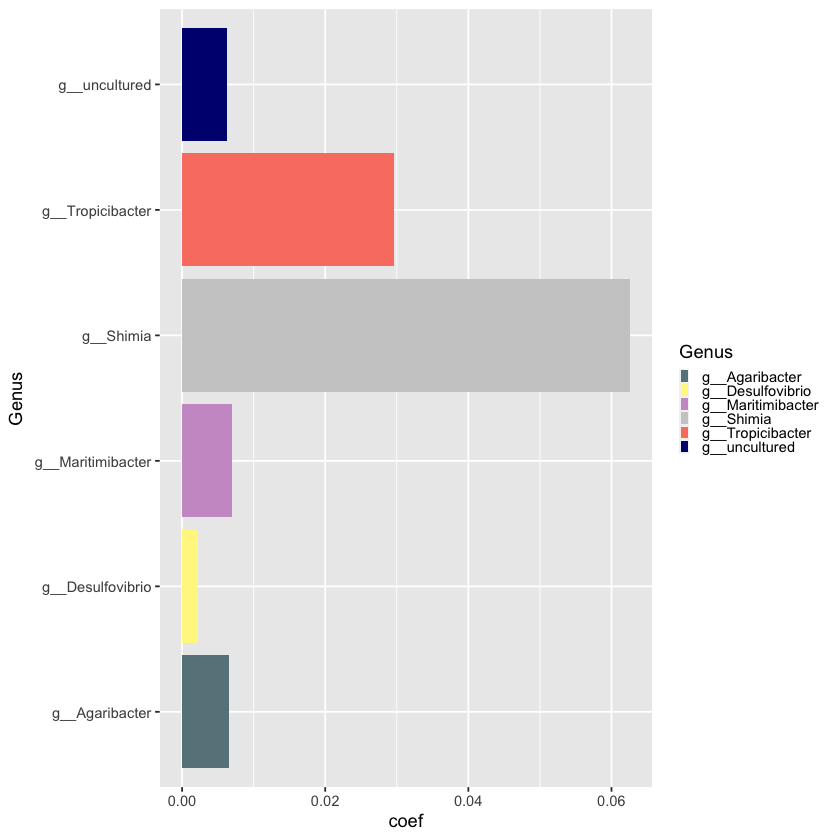

In [84]:
meta_fits_DL %>% 
  filter(qval.fdr < 0.001) %>% 
  arrange(coef) %>% 
  mutate(Feature.ID = factor(Feature.ID, levels =Feature.ID)) %>% 
  ggplot(aes(y = coef, x =Genus, fill=Genus)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c("lightblue4", "khaki1", "#CD9BCD", "gray80", "salmon", "Navy","#D14285", "#652926","#8569D5", "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "khaki1", "lightblue4", "lightpink", "ivory4", "yellow2","royalblue4", "darkorchid", "palevioletred1", "#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.40, keyheight = 0.45, ncol=1))

In [86]:
fit_lm_meta_DU <- lm_meta(feature_abd = abd_DU,
                       batch = "Alias",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_DU,
                       control = list(verbose = FALSE))

meta_fits_DU <- fit_lm_meta_DU$meta_fits

colnames(meta_fits_DU)
dim(meta_fits_DU)
colnames(meta_fits_DU)
meta_fits_DU=rename(meta_fits_DU, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in lm_meta(feature_abd = abd_DU, batch = "Alias", exposure = "tissue_type", :
“Exposure variable is missing or has only one non-missing value in the following batches; Maaslin2 won't be fitted on them
FloridaReefTract2017, LooeKey_2018, StewartMedina_FL2019, TransmissionExperimentMucus, TransmissionExperimentTissue”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature 3451f6bc8275cd0de36808407ff26b64;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature d0c1ec980683f458d2c6159bdffbd3f2;
Fisher scoring algorithm may have gotten stuck at a local maximum.

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_AcroporaDisease"             
[13] "weight_EMP"                          "weight_ENS_LBTS1"                   
[15] "weight_JSEP_SCTLD_Endo"              "weight_SSIDDiseaseConchReefSampling"
[17] "weight_SWGmicrobiome2018"            "weight_SWGTransmission"             
[19] "weight_USVIFeb2020"                  "pval.bonf"                          
[21] "qval.fdr"

[1] 5388   21

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_AcroporaDisease"             
[13] "weight_EMP"                          "weight_ENS_LBTS1"                   
[15] "weight_JSEP_SCTLD_Endo"              "weight_SSIDDiseaseConchReefSampling"
[17] "weight_SWGmicrobiome2018"            "weight_SWGTransmission"             
[19] "weight_USVIFeb2020"                  "pval.bonf"                          
[21] "qval.fdr"

Joining, by = "Feature.ID"



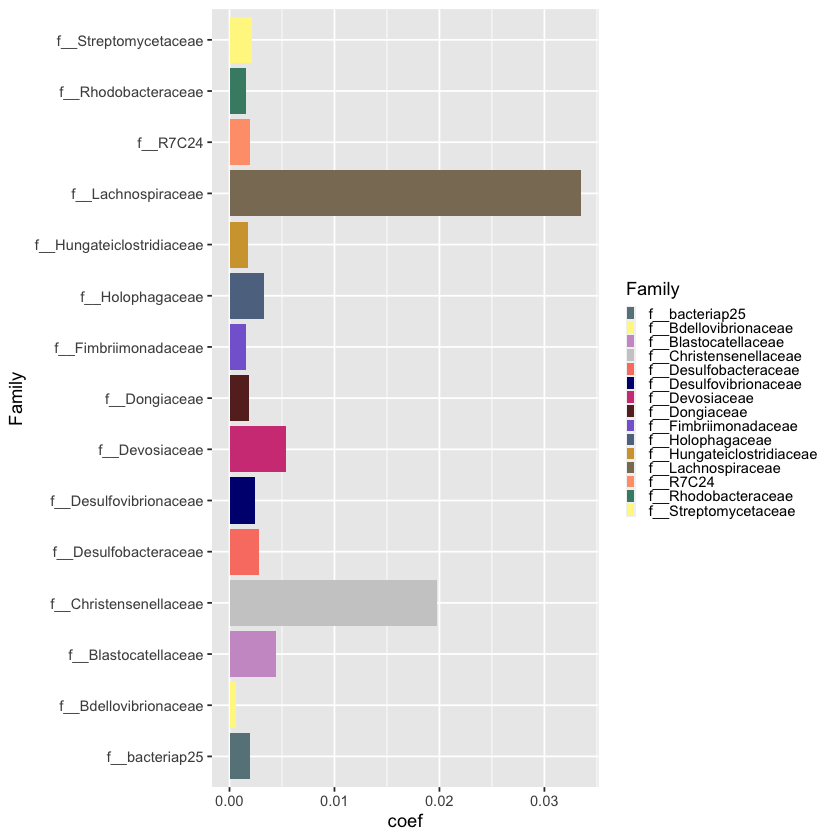

In [91]:
meta_fits_DU %>% 
  filter(qval.fdr < 0.001) %>% 
  arrange(coef) %>% 
  mutate(Feature.ID = factor(Feature.ID, levels =Feature.ID)) %>% 
  ggplot(aes(y = coef, x =Family, fill=Family)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c("lightblue4", "khaki1", "#CD9BCD", "gray80", "salmon", "Navy","#D14285", "#652926","#8569D5", "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "khaki1", "lightblue4", "lightpink", "ivory4", "yellow2","royalblue4", "darkorchid", "palevioletred1", "#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.40, keyheight = 0.45, ncol=1))

In [92]:
fit_lm_meta_DL <- lm_meta(feature_abd = abd_skeleton_DL,
                       batch = "Alias",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_skeleton_DL,
                       control = list(verbose = FALSE))

meta_fits_SK_DL <- fit_lm_meta_DL$meta_fits

colnames(meta_fits_SK_DL)
dim(meta_fits_SK_DL)
colnames(meta_fits_SK_DL)
meta_fits_SK_DL=rename(meta_fits_SK_DL, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature d9dbd300a8d9bbfbd80a8afdcf5ee5a8;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature 446633eae253a5970062311bdace62c5;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”


[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_JSEP_SCTLD_Endo"             
[13] "weight_LooeKey_2018"                 "weight_SSIDDiseaseConchReefSampling"
[15] "pval.bonf"                           "qval.fdr"

[1] 113  16

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_JSEP_SCTLD_Endo"             
[13] "weight_LooeKey_2018"                 "weight_SSIDDiseaseConchReefSampling"
[15] "pval.bonf"                           "qval.fdr"

Joining, by = "Feature.ID"



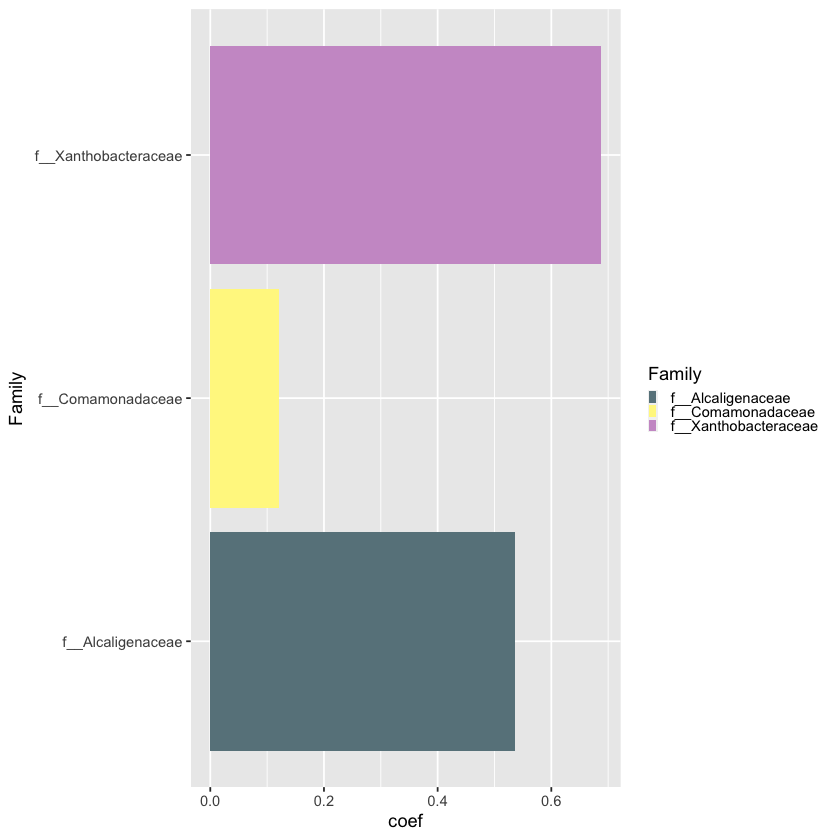

In [95]:
meta_fits_SK_DL %>%   
filter(qval.fdr < 0.05) %>% 
  arrange(coef) %>% 
  mutate(Feature.ID = factor(Feature.ID, levels =Feature.ID)) %>% 
  ggplot(aes(y = coef, x =Family, fill=Family)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c("lightblue4", "khaki1", "#CD9BCD", "gray80", "salmon", "Navy","#D14285", "#652926","#8569D5", "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "khaki1", "lightblue4", "lightpink", "ivory4", "yellow2","royalblue4", "darkorchid", "palevioletred1", "#CBD588","#5F7FC7", 
                           "orange","#DA5724","#CD9BCD", "gray80", "Pink", "Blue")) +
guides(fill = guide_legend(keywidth = 0.40, keyheight = 0.45, ncol=1))

In [96]:
fit_lm_meta_DU <- lm_meta(feature_abd = abd_skeleton_DU,
                       batch = "Alias",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_skeleton_DU,
                       control = list(verbose = FALSE))

meta_fits_SK_DU <- fit_lm_meta_DU$meta_fits

colnames(meta_fits_SK_DU)
dim(meta_fits_SK_DU)
colnames(meta_fits_SK_DU)
meta_fits_SK_DU=rename(meta_fits_SK_DU, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in lm_meta(feature_abd = abd_skeleton_DU, batch = "Alias", exposure = "tissue_type", :
“Exposure variable is missing or has only one non-missing value in the following batches; Maaslin2 won't be fitted on them
LooeKey_2018”


[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_JSEP_SCTLD_Endo"             
[13] "weight_SSIDDiseaseConchReefSampling" "pval.bonf"                          
[15] "qval.fdr"

[1] 120  15

[1] "feature"                             "exposure"                           
 [3] "coef"                                "stderr"                             
 [5] "pval"                                "k"                                  
 [7] "tau2"                                "stderr.tau2"                        
 [9] "pval.tau2"                           "I2"                                 
[11] "H2"                                  "weight_JSEP_SCTLD_Endo"             
[13] "weight_SSIDDiseaseConchReefSampling" "pval.bonf"                          
[15] "qval.fdr"

Joining, by = "Feature.ID"



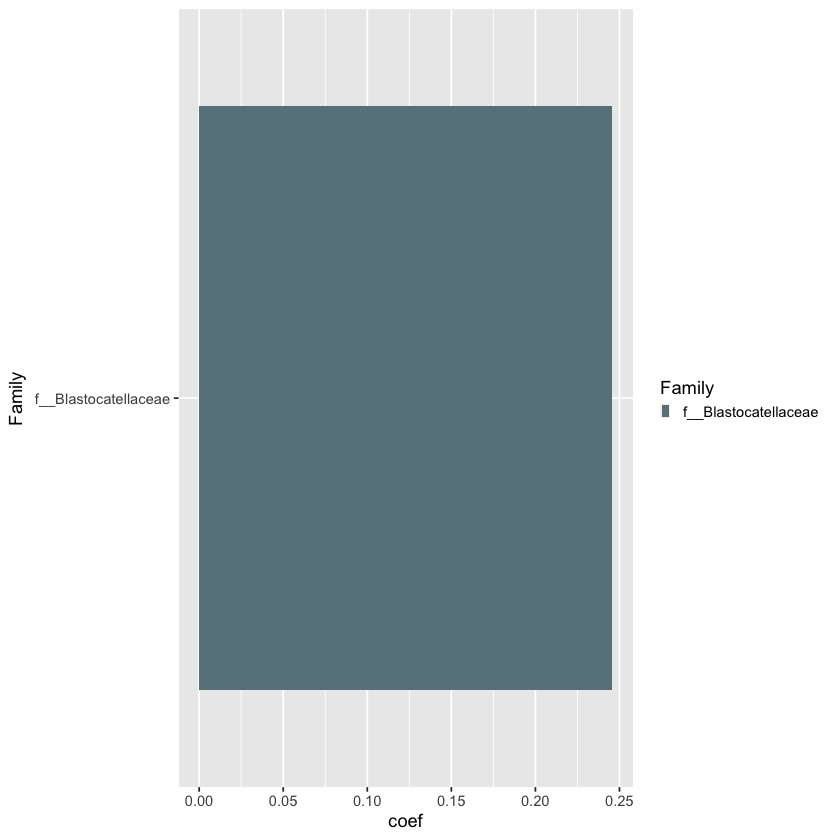

In [97]:
meta_fits_SK_DU %>%   
filter(qval.fdr < 0.05) %>% 
  arrange(coef) %>% 
  mutate(Feature.ID = factor(Feature.ID, levels =Feature.ID)) %>% 
  ggplot(aes(y = coef, x =Family, fill=Family)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c("lightblue4", "khaki1", "#CD9BCD", "gray80", "salmon", "Navy","#D14285", "#652926","#8569D5", "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "khaki1", "lightblue4", "lightpink", "ivory4", "yellow2","royalblue4", "darkorchid", "palevioletred1", "#CBD588","#5F7FC7", 
                           "orange","#DA5724","#CD9BCD", "gray80", "Pink", "Blue")) +
guides(fill = guide_legend(keywidth = 0.40, keyheight = 0.45, ncol=1))

In [99]:
colnames(meta_mucus_DL)

[1] "BioSample"                       "Run"                            
 [3] "SRA_accession"                   "Lab"                            
 [5] "Experiment"                      "Alias"                          
 [7] "Collection_ID"                   "collection_time"                
 [9] "collection_year"                 "collection_month"               
[11] "collection_date"                 "collected_by"                   
[13] "environment_.biome."             "latitude"                       
[15] "longitude"                       "country"                        
[17] "reef_name"                       "reef_abbr"                      
[19] "reef_type"                       "SCTLD_status"                   
[21] "SCTLD_site_duration"             "depth"                          
[23] "temperature"                     "salinity"                       
[25] "pH"                              "nutrientdatacollected."         
[27] "sample_type"                     "binary_algal_contact"           
[29] "binary_disease"                  "binary_bleaching"               
[31] "tissue_type"                     "field_host_family_id"           
[33] "field_host_genus_id"             "field_host_species_id"          
[35] "species_code"                    "project_colony_code"            
[37] "colony_max_diameter"             "colony_max_height"              
[39] "colony_old_mortality"            "colony_recent_mortality_disease"
[41] "colony_percent_diseased"         "lesion_distribution"            
[43] "lesion_start"                    "lesion_rate"                    
[45] "lesion_margin"                   "disease_colony_sample_distance" 
[47] "complex_robust"                  "dna_extraction_method"          
[49] "X16S_variable_region"            "primer_names"                   
[51] "forwardPrimer"                   "ReversePrimer"                  
[53] "linkerPrimerSequence"            "platform"                       
[55] "platformChemistry"               "sequencing_facility"            
[57] "barcodes"                        "basepairs"                      
[59] "notes"

In [102]:
fit_lm_meta_MS_DL <- lm_meta(feature_abd = abd_mucus_DL,
                       batch = "species_code",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_mucus_DL,
                       control = list(verbose = FALSE))

meta_fits_MS_DL <- fit_lm_meta_MS_DL$meta_fits

colnames(meta_fits_MS_DL)
dim(meta_fits_MS_DL)
colnames(meta_fits_MS_DL)
meta_fits_MS_DL=rename(meta_fits_MS_DL, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature d2acfee9b981822b3afa1f1b967af07c;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature dab22d10f7b65d9822ef6be327f14265;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message in rma_wrapper(maaslin_fits, method = control$rma_method, output = control$output, :
“Fitting rma on feature 83cebf00aca1b32cb3aa9d066dcd9008;
Fisher scoring algorithm may have gotten stuck at a local maximum.
  Setting tau^2 = 0. Check the prof

[1] "feature"     "exposure"    "coef"        "stderr"      "pval"       
 [6] "k"           "tau2"        "stderr.tau2" "pval.tau2"   "I2"         
[11] "H2"          "weight_CNAT" "weight_DLAB" "weight_MCAV" "weight_OANN"
[16] "weight_PAST" "weight_PSTR" "weight_SSID" "pval.bonf"   "qval.fdr"

[1] 1377   20

[1] "feature"     "exposure"    "coef"        "stderr"      "pval"       
 [6] "k"           "tau2"        "stderr.tau2" "pval.tau2"   "I2"         
[11] "H2"          "weight_CNAT" "weight_DLAB" "weight_MCAV" "weight_OANN"
[16] "weight_PAST" "weight_PSTR" "weight_SSID" "pval.bonf"   "qval.fdr"

Joining, by = "Feature.ID"



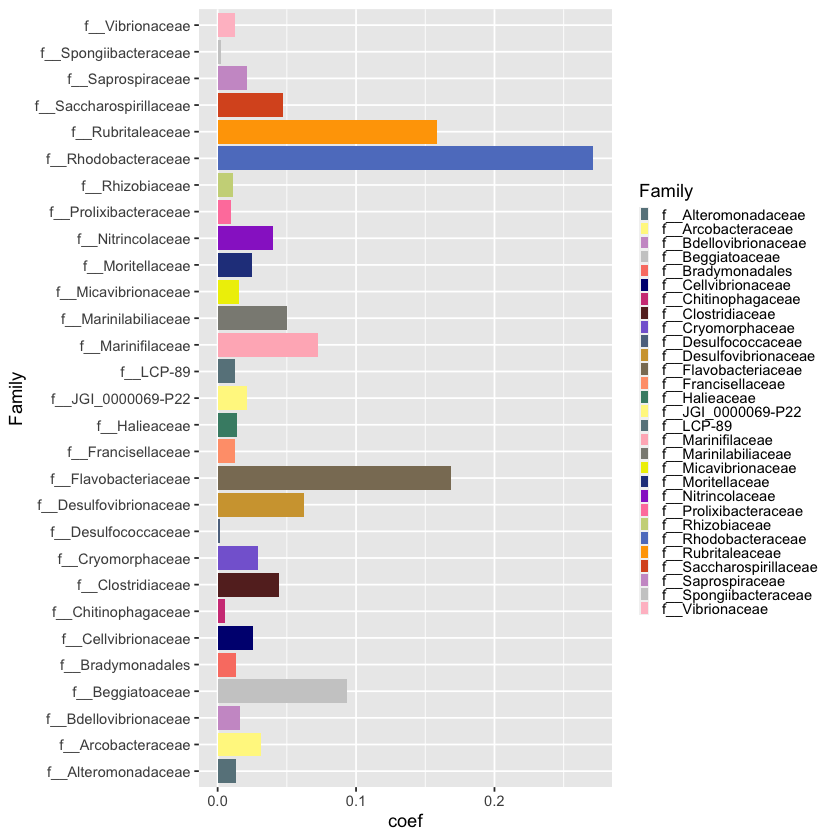

In [106]:
meta_fits_MS_DL %>%   
filter(qval.fdr < 0.00001) %>% 
  arrange(coef) %>% 
  mutate(Feature.ID = factor(Feature.ID, levels =Feature.ID)) %>% 
  ggplot(aes(y = coef, x =Family, fill=Family)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values=c("lightblue4", "khaki1", "#CD9BCD", "gray80", "salmon", "Navy","#D14285", "#652926","#8569D5", "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "khaki1", "lightblue4", "lightpink", "ivory4", "yellow2","royalblue4", "darkorchid", "palevioletred1", "#CBD588","#5F7FC7", 
                           "orange","#DA5724","#CD9BCD", "gray80", "Pink", "Blue")) +
guides(fill = guide_legend(keywidth = 0.40, keyheight = 0.45, ncol=1))

In [109]:
meta_mucus_DU$tissue_type

[1] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [16] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [31] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [46] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [61] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [76] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [91] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[106] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[121] "AH" "AH" "DU" "DU" "DU" "DU" "AH" "DU" "DU" "AH" "DU" "DU" "DU" "AH" "DU"
[136] "DU" "DU" "DU" "AH" "AH" "DU" "AH" "AH" "AH" "DU" "DU" "AH" "AH" "DU" "DU"
[151] "AH" "AH" "AH" "DU" "DU" "AH" "DU" "AH" "AH" "DU" "DU" "DU" "DU" "DU" "AH"
[166] "DU" "DU" "DU" "DU" "DU" "AH" "DU" "DU" "AH" "AH" "DU" "AH" "AH" "DU" "AH"
[181] "AH" "AH" "DU" "AH" "DU" "DU" "AH" "AH" "AH" "DU" "AH" "AH" "AH" "DU" "DU"
[196] "AH" "DU" "AH" "DU" "AH" "AH" "DU" "DU" "DU" "AH" "DU" "DU" "DU" "AH" "DU"
[211] "DU" "AH" "AH" "DU" "DU" "DU" "AH" "DU" "DU" "DU" "AH" "AH" "DU" "AH" "AH"
[226] "AH" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "AH" "AH" "AH" "AH" "DU"
[241] "DU" "DU" "DU" "DU" "DU" "AH" "DU" "DU" "DU" "DU" "DU" "DU" "AH" "AH" "AH"
[256] "DU" "DU" "AH" "AH" "AH" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "DU" "DU"
[271] "DU" "DU" "DU" "DU" "AH" "DU" "DU" "AH" "AH" "AH" "AH" "DU" "DU" "DU" "AH"
[286] "DU" "DU" "DU" "DU" "DU" "DU" "AH" "AH" "AH" "DU" "DU" "DU" "DU" "DU" "DU"
[301] "DU" "DU" "AH" "AH" "DU" "AH" "DU" "AH" "DU" "AH" "AH" "DU" "DU" "DU" "AH"
[316] "DU" "DU" "AH" "AH" "DU" "DU" "DU" "DU" "AH" "DU" "AH"

In [108]:
fit_lm_meta_MS_DU <- lm_meta(feature_abd = abd_mucus_DU,
                       batch = "species_code",
                       exposure = "tissue_type",
                       #covariates = "species_code",
                       data = meta_mucus_DU,
                       control = list(verbose = FALSE))

meta_fits_MS_DU <- fit_lm_meta_MS_DU$meta_fits

colnames(meta_fits_MS_DU)
dim(meta_fits_MS_DU)
colnames(meta_fits_MS_DU)
meta_fits_MS_DU=rename(meta_fits_MS_DU, Feature.ID = feature) %>%
inner_join(taxtable_16S)

Warning message in check_batch(df_batch[[batch]], min_n_batch = 2):
“Batch variable is not a factor as provided and will be converted to one.”
Warning message in lm_meta(feature_abd = abd_mucus_DU, batch = "species_code", exposure = "tissue_type", :
“Exposure variable is missing or has only one non-missing value in the following batches; Maaslin2 won't be fitted on them
CNAT, DLAB, OANN, PAST, PSTR, SSID”


ERROR: Error in maaslin_fits[[2]]: subscript out of bounds
